In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [87]:
fb = pd.read_csv('facebook_train.csv')
fb.info()
fb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
total_followers    397 non-null int64
type               397 non-null object
category           397 non-null int64
month              397 non-null int64
weekday            397 non-null int64
hour               397 non-null int64
paid               397 non-null int64
comment            397 non-null int64
like               397 non-null int64
share              397 non-null int64
dtypes: int64(9), object(1)
memory usage: 31.1+ KB


,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21


In [88]:
#factorize string columns
fb['type'],fb_type = pd.factorize(fb['type'])
print(fb_type)

Index(['Photo', 'Link', 'Status', 'Video'], dtype='object')


In [96]:
fb_x = fb[['total_followers','type','category','month','weekday','hour','paid']]
fb_like = fb[['like']]
fb_comment = fb[['comment']]
fb_share = fb[['share']]
print(fb_x.head())
print(fb_like.head())
print(fb_comment.head())
print(fb_share.head())

   total_followers  type  category  month  weekday  hour  paid
0           124050     0         3      6        4    17     1
1           132556     0         2      8        3    24     0
2            92786     0         2      2        6    17     1
3           135632     0         1      9        2     1     0
4           139540     1         1     12        3    17     1
   like
0    77
1   313
2   145
3   299
4   229
   comment
0        3
1       11
2        2
3        2
4        7
   share
0     16
1     50
2     39
3     49
4     21


In [97]:
from sklearn.model_selection import train_test_split

#split into train and test data
fb_x_train,fb_x_test,fb_like_train,fb_like_test = train_test_split(fb_x,fb_like,test_size=0.2)
fb_x_train,fb_x_test,fb_comment_train,fb_comment_test = train_test_split(fb_x,fb_comment,test_size=0.2)
fb_x_train,fb_x_test,fb_share_train,fb_share_test = train_test_split(fb_x,fb_share,test_size=0.2)

[[458.59304241]
 [128.51888414]
 [556.53213171]
 [219.89430717]
 [185.43989492]]


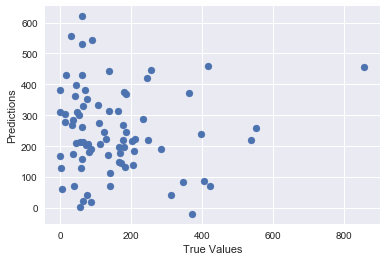

Score: -1.311769052556362
[[409.59199695]
 [255.75239738]
 [242.94867153]
 [175.56715313]
 [215.2660508 ]]


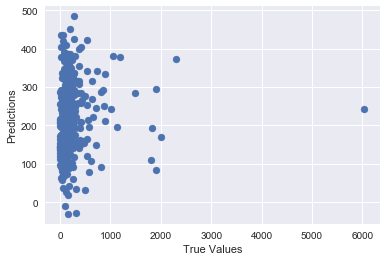

Cross-validated scores: [-0.1335011   0.07682692  0.00157787 -0.0145426  -0.00877784 -0.10329765]


In [119]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict

lm = linear_model.LinearRegression()
model = lm.fit(fb_x_train, fb_like_train)
predictions = lm.predict(fb_x_test)
print(predictions[:5])

## The line / model
plt.scatter(fb_like_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print("Score:", model.score(fb_x_test, fb_like_test))


cv_predictions = cross_val_predict(model,fb_x,fb_like)
print(cv_predictions[:5])
plt.scatter(fb_like, cv_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
scores = cross_val_score(model, fb_x, fb_like, cv=6)
print("Cross-validated scores:", scores)

In [3]:
casualty = pd.read_csv('casualty_train.csv')
casualty.info()
casualty.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232835 entries, 0 to 232834
Data columns (total 8 columns):
casualty_class         232835 non-null object
gender                 232835 non-null object
age                    232835 non-null object
severe                 232835 non-null bool
pedestrian_location    43259 non-null object
pedestrian_movement    43259 non-null object
travel                 232835 non-null object
year                   232835 non-null int64
dtypes: bool(1), int64(1), object(6)
memory usage: 12.7+ MB


,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010


In [4]:
#large chunk of "age" values are unknown, so fill in with mean age.
print(f"{len(casualty[casualty['age'] == 'Unknown'])} unknown age values")

#if age is unknown, replace with 0
casualty.loc[casualty['age'] == 'Unknown', 'age'] = 0
#convert age column to int so that mean can be obtained
casualty['age'] = casualty['age'].astype(int)
#replace all 0 age values with mean
print(f"mean age: {int(np.mean(casualty['age']))}")
casualty.loc[casualty['age'] == 0, 'age'] = int(np.mean(casualty['age']))

16225 unknown age values
mean age: 32


In [5]:
#factorize string columns
casualty['casualty_class'],casualty_class = pd.factorize(casualty['casualty_class'])
casualty['gender'],gender = pd.factorize(casualty['gender'])
casualty['travel'],travel = pd.factorize(casualty['travel'])
casualty['year'] = casualty['year'].astype(int)


In [6]:
#check labels
print(casualty_class)
print(gender)
print(travel)

casualty.info()

Index(['passenger', 'pedestrian', 'driver'], dtype='object')
Index(['female', 'male'], dtype='object')
Index(['motorbike', 'car', 'pedestrian', 'bicycle', 'taxi', 'bus', 'other'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232835 entries, 0 to 232834
Data columns (total 8 columns):
casualty_class         232835 non-null int64
gender                 232835 non-null int64
age                    232835 non-null int64
severe                 232835 non-null bool
pedestrian_location    43259 non-null object
pedestrian_movement    43259 non-null object
travel                 232835 non-null int64
year                   232835 non-null int64
dtypes: bool(1), int64(5), object(2)
memory usage: 12.7+ MB


In [56]:
casualty_x = casualty[['casualty_class','gender','age','travel','year']]
casualty_y = casualty[['severe']]
print(casualty_x.head())
print(casualty_y.head())

   casualty_class  gender  age  travel  year
0               0       0   33       0  2007
1               0       0   20       1  2005
2               0       1   52       1  2006
3               0       0   17       2  2012
4               0       0   20       0  2010
   severe
0   False
1   False
2   False
3   False
4   False


In [53]:
#split into train and test data
casualty_x_train,casualty_x_test,casualty_y_train,casualty_y_test = train_test_split(casualty_x,casualty_y,test_size=0.2)
print(casualty_x_train.shape, casualty_y_train.shape)
print(casualty_x_test.shape, casualty_y_test.shape)

(186268, 5) (186268, 1)
(46567, 5) (46567, 1)


Text(0,0.5,'Cross-validated accuracy')

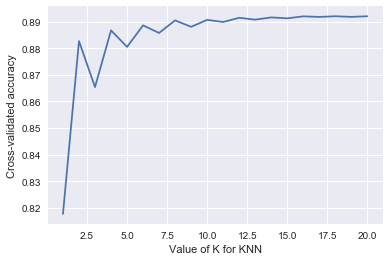

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 21)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, casualty_x_train, casualty_y_train.values.ravel(), scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [63]:
chosen_knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(casualty_x_train, casualty_y_train.values.ravel())
predictions = model.predict(casualty_x_test)

In [69]:
print(predictions)
print("Score:", model.score(casualty_x_test, casualty_y_test))

[False False False ... False False False]
Score: 0.892477505529667


In [85]:
#quantify how much the different input variables predict the severity outcome
n_feats = casualty_x_train.shape[1]
knn = KNeighborsClassifier()

print('Feature  Accuracy')
for i in range(n_feats):
    X = casualty_x_train.values[:,i].reshape(-1, 1)
    scores = cross_val_score(knn, X, casualty_y_train.values.ravel(), scoring='accuracy')
    print('%d        %g' % (i, scores.mean()))
    

Feature  Accuracy
0        0.854941
1        0.8923
2        0.881826
3        0.8923
4        0.8923


### References:

<ul>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">cross_val_score documentation</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/model_evaluation.html">Scoring parameter</a></li>
    <li><a href="https://github.com/scikit-learn/scikit-learn/issues/2439">Negative MSE Explained</a></li>
    <li><a href="https://www.ritchieng.com/machine-learning-cross-validation/">General Cross-Validation tutorial</a></li>
</ul>